## Exercise-06
## Index No - 190621M
## Name - K. Thanushan

### Question 1.

(-0.5, 557.5, 562.5, -0.5)

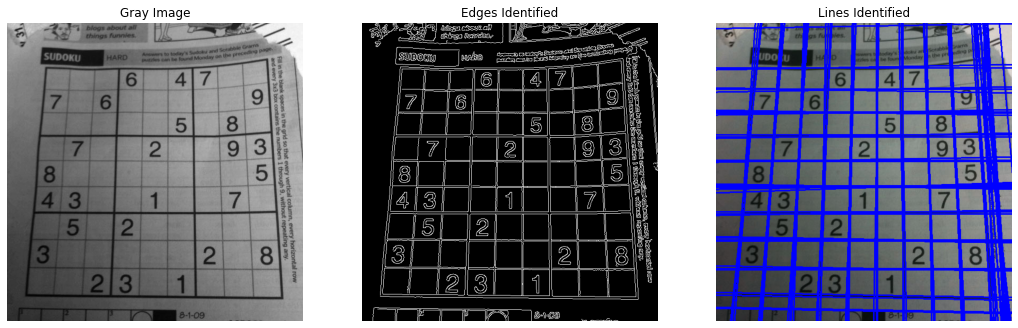

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
Image = cv.imread("sudoku.png", cv.IMREAD_COLOR)
assert Image is not None
gray = cv.cvtColor(Image, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 20, 120, apertureSize=3)
lines = cv.HoughLines(edges, 1, np.pi/180, 150)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0, y0 = a*rho, b*rho
    x1, y1 = int(x0 + 1000*(-b)), int(y0 + 1000*(a))
    x2, y2 = int(x0 - 1000*(-b)), int(y0 - 1000*(a))
    cv.line(Image, (x1,y1), (x2,y2), (0,0,255), 2)
    
fig, ax = plt.subplots(1,3, figsize = (18,6))
ax[0].imshow(gray, cmap = 'gray')
ax[0].set_title('Gray Image')
ax[0].axis('off')
ax[1].imshow(edges, cmap = 'gray')
ax[1].set_title('Edges Identified')
ax[1].axis('off')
ax[2].imshow(Image)
ax[2].set_title('Lines Identified')
ax[2].axis('off')



### Question 2.

(-0.5, 499.5, 347.5, -0.5)

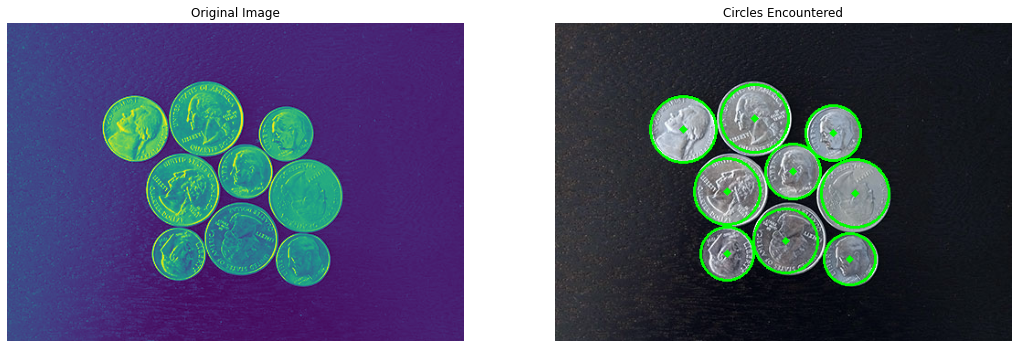

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
Image = cv.imread("coins.jpg", cv.IMREAD_COLOR)
assert Image is not None
gray = cv.cvtColor(Image, cv.COLOR_BGR2GRAY)
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, 50, param1 = 150, param2 = 20, minRadius=25, maxRadius=38)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    #Draw the outer circle
    cv.circle(Image, (i[0], i[1]), i[2], (0,255,0),2)
    #Draw the center of the circle
    cv.circle(Image, (i[0], i[1]), 2, (0,255,0),3)
fig, ax = plt.subplots(1,2, figsize = (18,6))
ax[0].imshow(gray)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(Image)
ax[1].set_title('Circles Encountered')
ax[1].axis('off')



### Question 3.

x = 29.0, y = 109.0, scale = 1.0, orientation = 0.0, p1 = (4, 76), p2 = (54, 141)


(-0.5, 199.5, 149.5, -0.5)

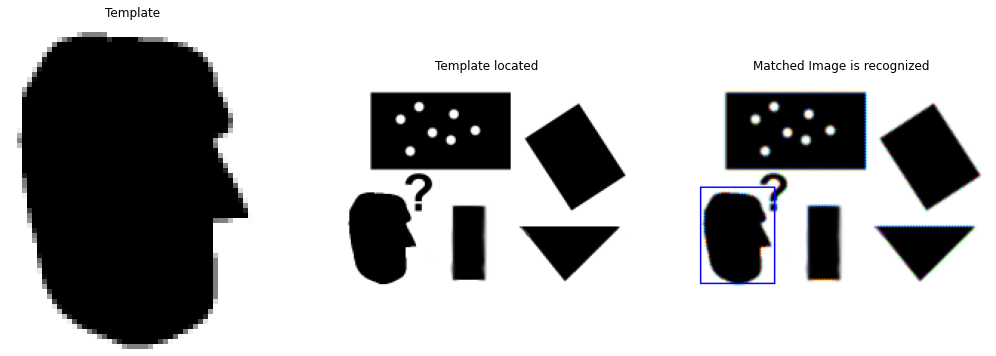

In [5]:
import numpy as np
import cv2 as cv

Image = cv.imread("pic1.png", cv.IMREAD_REDUCED_GRAYSCALE_2)
assert Image is not None
temp1 = cv.imread('templ.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert temp1 is not None

im_edges = cv.Canny(Image, 50, 250)
temp1_edges = cv.Canny(temp1, 50, 250)
alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(temp1_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)
positions, vote = alg.detect(im_edges)

out = cv.cvtColor(Image, cv.COLOR_BAYER_BG2BGR)
for x, y, scale, orientation in positions[0]:
    halfHeight = temp1.shape[0]/2.*scale
    halfWidth = temp1.shape[1]/2.*scale
    p1 = (int(x - halfWidth), int(y-halfHeight))
    p2 = (int(x + halfWidth), int(y+halfHeight))
    print("x = {}, y = {}, scale = {}, orientation = {}, p1 = {}, p2 = {}".format(x, y, scale, orientation, p1, p2))
    cv.rectangle(out, p1, p2, (0,0,255))


fig, ax = plt.subplots(1,3, figsize = (18,6))
ax[0].imshow(temp1, cmap = 'gray')
ax[0].set_title('Template')
ax[0].axis('off')
ax[1].imshow(Image, cmap = 'gray')
ax[1].set_title('Template located')
ax[1].axis('off')
ax[2].imshow(out)
ax[2].set_title('Matched Image is recognized')
ax[2].axis('off')



### Question 4.

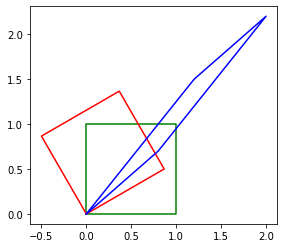

In [6]:
import numpy as np
import matplotlib.pyplot as plt
a, b, c, d = [0,0,1], [0,1,1], [1,1,1], [1,0,1]
X = np.array([a,b,c,d]).T
theta = np.pi*30/180
s = 1
tx, ty = 0, 0
H = np.array([[s*np.cos(theta), -s*np.sin(theta), tx],[s*np.sin(theta), s*np.cos(theta), ty], [0,0,1]])
Y = H@X
a11, a12, a21, a22 = 0.8, 1.2, 0.7, 1.5
A = np.array([[a11,a12, tx],[a21, a22, ty], [0,0,1]])
B = A@X
x = np.append(X[0,:], X[0,0])
y = np.append(X[1,:], X[1,0])
fig, ax = plt.subplots(1,1)
ax.plot(x, y, color='g')
ax.set_aspect('equal')
x = np.append(Y[0,:], Y[0,0])
y = np.append(Y[1,:], Y[1,0])
ax.plot(x, y, color='r')
ax.set_aspect('equal')
x = np.append(B[0,:], B[0,0])
y = np.append(B[1,:], B[1,0])
ax.plot(x, y, color='b')
ax.set_aspect('equal')
plt.show()


### Question 5.

(-0.5, 899.5, 899.5, -0.5)

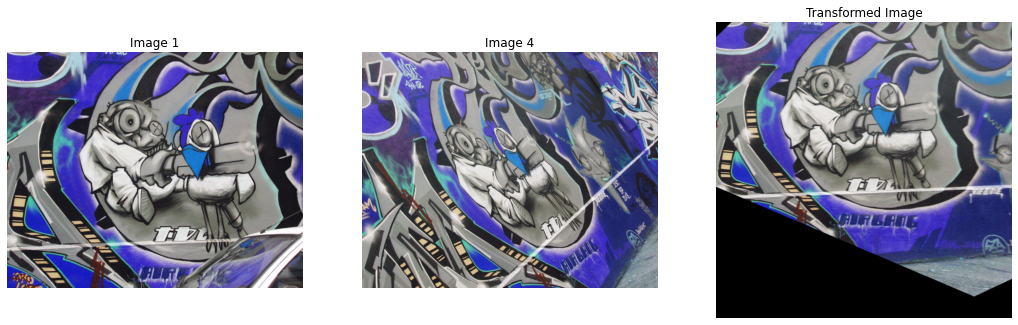

In [8]:
#Warping using the given hormography
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im1 = cv.imread(r'./graf/img1.ppm', cv.IMREAD_ANYCOLOR)
im4 = cv.imread(r'./graf/img4.ppm', cv.IMREAD_ANYCOLOR)
assert im1 is not None
assert im4 is not None
with open(r'./graf/H1to4p') as f:
    H = np.array([[float(h) for h in line.split()] for line in f])
im1to4 = cv.warpPerspective(im4, np.linalg.inv(H), (900,900))
fig, ax = plt.subplots(1,3, figsize = (18,6))
ax[0].imshow(im1)
ax[0].set_title('Image 1')
ax[0].axis('off')
ax[1].imshow(im4)
ax[1].set_title('Image 4')
ax[1].axis('off')
ax[2].imshow(im1to4)
ax[2].set_title('Transformed Image')
ax[2].axis('off')